In [1]:
# imports
%reload_ext autoreload
%autoreload 2
%matplotlib inline 

from utils.basic_utils import *
from utils.pricing import *
from utils.imports import *
from utils.structured import *

import matplotlib.pyplot as plt
from IPython.display import display

Loading utils/config.json
Loading file quote/csv/2019-02-26
Loading file summary-categories/assetProfile


In [2]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

In [7]:
# PATH = './'
# !ls {PATH}

ds_macro_vix.ipynb macro-vix-raw      tmp                utils


### Get universe pricing

In [43]:
risk_symbol = '^VIX'
bench_symbol = '^GSPC'

In [368]:
# Load pricing, refresh once
benchSL, sectorSL, riskSL, rateSL, bondSL, commSL, currSL = \
    config['benchmarks'], config['sectors'], config['risk'], config['rates'], \
    config['bonds'],config['commodities'], config['currencies']
symbols_list = benchSL + sectorSL + riskSL + rateSL + bondSL + commSL + currSL
f'Total securities {len(symbols_list)}: {symbols_list}'

"Total securities 60: ['^DJI', '^IXIC', '^GSPC', '^RUT', 'SPY', 'QQQ', 'DIA', 'IWM', 'IJR', 'IJH', 'FXI', 'EEM', 'XLB', 'XLC', 'XLE', 'XLF', 'XLI', 'XLK', 'XLP', 'XLRE', 'XLU', 'XLV', 'XLY', '^VIX', '^IRX', '^FVX', '^TNX', '^TYX', 'BND', 'BNDX', 'EMB', 'GOVT', 'HYG', 'IEF', 'JNK', 'LQD', 'MUB', 'SHY', 'TIP', 'TLT', 'QYLD', 'GC=F', 'SI=F', 'HG=F', 'CL=F', 'NG=F', 'BZ=F', 'EURUSD=X', 'JPY=X', 'GBPUSD=X', 'CNY=X', 'HKD=X', 'MXN=X', 'AUDUSD=X', 'NZDUSD=X', 'TWD=X', 'CHF=X', 'CLP=X', 'KRW=X', 'DX-Y.NYB']"

In [ ]:
# Retrieves daily pricing for list of symbols
%time [get_pricing(s, '1d', '30y') for s in symbols_list];

In [ ]:
%time px_close = get_mults_pricing(symbols_list, freq, 'close');

Given the date range of key series currently working only with:
- Benchmarks: DOW, Nasdaq, SPY, and Russell 2000
- Sectors ETFs (excluding benchmarks)
- Rates: 2, 5, 10, and 30 year treasuries
- Risk: VIX
- Hard currencies (JPY, EUR, GBP and Dollar Index DXY)
- Corporate Bonds: Investment Grade (LQD), High Yield (JNK and HYG)

Ideally would like to go back further are include:
- Commodities price change
- Yields Spreads from Corporate Spreads

In [388]:
def excl(a, b): return list(set(a).difference(b))
keep_sect = excl(sectorSL, ['SPY', 'QQQ', 'DIA', 'IWM', 'XLC', 'XLRE'])
keep_curr = excl(currSL, ['HKD=X', 'MXN=X', 'AUDUSD=X', 'NZDUSD=X', 'TWD=X', 'CLP=X', 'KRW=X'])
keep_bonds = ['LQD', 'HYG', 'JNK']

In [428]:
to_keep = benchSL + keep_sect + rateSL + riskSL + keep_curr + keep_bonds
px_close[to_keep].describe().T.sort_values(by='count')

,count,mean,std,min,25%,50%,75%,max
DX-Y.NYB,2355.0,85.457822,8.303297,71.330002,79.410004,82.309998,94.450001,103.290001
JNK,2829.0,38.242467,3.303818,25.850000,36.230000,38.619999,40.310001,48.060001
HYG,2994.0,88.772298,6.720135,61.639999,85.739998,88.690002,92.517498,106.089996
EURUSD=X,3044.0,1.275895,0.118290,1.039047,1.185691,1.281641,1.355735,1.598798
GBPUSD=X,3055.0,1.622195,0.214958,1.215732,1.491458,1.599207,1.792307,2.108192
CHF=X,3095.0,1.052945,0.134391,0.722800,0.951800,0.999710,1.181400,1.385800
CNY=X,3562.0,7.120520,0.809332,6.031200,6.380350,6.821400,8.074875,8.277900
FXI,3623.0,37.270006,8.884074,16.866671,33.655001,38.160000,42.470001,72.836670
EEM,3998.0,36.507688,9.440345,11.222222,32.130835,39.360001,43.000000,55.730000
LQD,4176.0,111.576489,6.880317,81.699997,106.750000,111.779999,116.739998,124.400002


In [13]:
# OLD: Retrieves historical pricing
secpx = get_symbol_pricing('^VIX')
secpx.rename(columns={'close': risk_symbol}, inplace=True)
secpx.drop(columns=['volume'], inplace=True)
secpx.set_index(secpx.index.astype(np.datetime64), inplace=True)

closepx = secpx[risk_symbol]
openpx = secpx['open']
lowpx = secpx['low']
highpx = secpx['high']

closepx_1d_shift = closepx.shift(1)
pct_chg = closepx.pct_change()

SPY = get_symbol_pricing('^GSPC', freq) # SPY pricing
SPY.set_index(SPY.index.astype(np.datetime64), inplace=True)

secpx[bench_symbol] = SPY['close']
SPY_close = secpx[bench_symbol]
SPY_pct_chg = secpx[bench_symbol].pct_change()

### Feature construction

In [347]:
# FX
FX = ['EURUSD=X', 'JPY=X', 'GBPUSD=X', 'CNY=X', 'CHF=X', 'DX-Y.NYB']
invert = ['EURUSD=X', 'GBPUSD=X']
raw_df = px_close[FX]
raw_df.describe().T

,count,mean,std,min,25%,50%,75%,max
EURUSD=X,3044.0,1.275895,0.118290,1.039047,1.185691,1.281641,1.355735,1.598798
JPY=X,4460.0,108.566220,14.041281,75.930000,101.899750,110.539001,118.632498,147.220001
GBPUSD=X,3055.0,1.622195,0.214958,1.215732,1.491458,1.599207,1.792307,2.108192
CNY=X,3562.0,7.120520,0.809332,6.031200,6.380350,6.821400,8.074875,8.277900
CHF=X,3095.0,1.052945,0.134391,0.722800,0.951800,0.999710,1.181400,1.385800
DX-Y.NYB,2355.0,85.457822,8.303297,71.330002,79.410004,82.309998,94.450001,103.290001


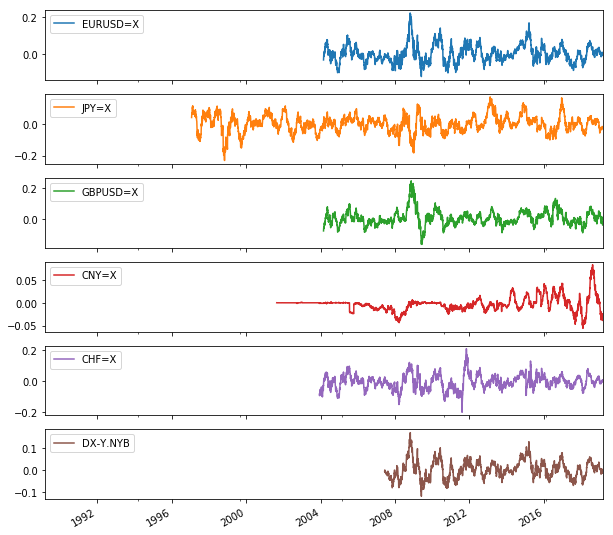

In [348]:
fx_df = raw_df.copy()
fx_df[invert] = (1 / raw_df[invert])
fx_df.tail(60)
fx_chg_df = fx_df.pct_change().rolling(60).sum()
fx_chg_df.plot(subplots=True, figsize=(10,10));

CPU times: user 899 ms, sys: 14.2 ms, total: 913 ms
Wall time: 1.6 s


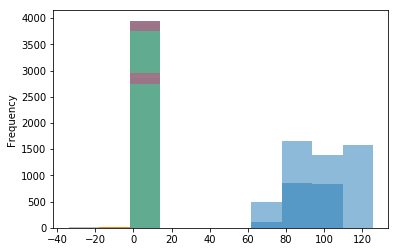

In [394]:
%%time
def fx_feats(fxs, invert):
    ndf = pd.DataFrame() 
    for fx in fxs:
        px_df = get_symbol_pricing(fx)
        if fx in invert: px_df = 1 / px_df
        ndf[fx] = px_df['close']
        ft_df = px_mom_feats(px_df, fx)
        ndf[ft_df.columns] = ft_df
    return ndf

FX = ['EURUSD=X', 'JPY=X', 'GBPUSD=X', 'CNY=X', 'CHF=X', 'DX-Y.NYB']
invert = ['EURUSD=X', 'GBPUSD=X']
fx_feats(FX, invert).plot.hist(alpha=0.5, legend=False)

CPU times: user 123 ms, sys: 3.53 ms, total: 127 ms
Wall time: 125 ms


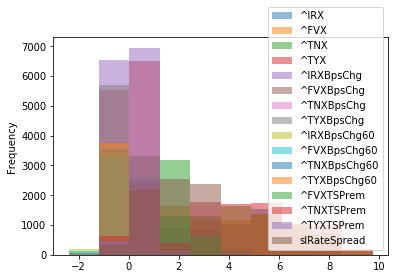

In [456]:
%%time
# Rates
def rate_feats(df):
    ndf = pd.DataFrame()
    ndf[df.columns] = df
    # bps daily change
    bps_chg = (df - df.shift(1))
    ndf[[x + 'BpsChg' for x in df.columns]] = bps_chg
    # bps rolling change
    cum_bps_chg = (df - df.shift(1)).rolling(60).sum()
    ndf[[x + 'BpsChg60' for x in df.columns]] = cum_bps_chg
    # term structure spreads
    ts_prem = (df - df.shift(1, axis=1))
    ndf[[x + 'TSPrem' for x in df.columns[1:]]] = ts_prem.iloc[:, 1:]
    # 3m vs. 10yr spread
    ndf['slRateSpread'] = (rates[rates.columns[-2]] - rates[rates.columns[0]])
    return ndf

rates = px_close[rateSL]
rate_feats(rates).plot.hist(alpha=0.5)

In [43]:
# Generic price momentum
def px_mom_feats(df, s, stds=1, invert=False):
    ndf = pd.DataFrame()
#     if invert: df = 1 / df
    c, o, l, h = df['close'], df['open'], df['low'], df['high']
    c1ds, pctChg = c.shift(1), c.pct_change()
    ndf[s + 'PctChgStds'] = pctChg.apply(sign_compare, args=(pctChg.std() * stds,))
    ndf[s + 'RollVol20'] = roll_vol(pctChg, 20)
    ndf[s + 'PctChg20'] = c.pct_change(periods=20)
    ndf[s + 'PctChg60'] = c.pct_change(periods=60)
    ndf[s + 'PctChg120'] = c.pct_change(periods=120)
    ndf[s + 'OpenGap20'] = ((o - c1ds) / c1ds).rolling(20).sum()
    ndf[s + 'HLDelta20'] = ((h - l) / c1ds).rolling(20).sum()
    ndf[s + 'Pct52WkH'] = (c / c.rolling(252).max())
    ndf[s + 'Pct52WkL'] = (c / c.rolling(252).min())
    return ndf

In [45]:
ft_df = px_mom_feats(get_symbol_pricing('^VIX'), '^VIX')
ft_df.columns

Index(['^VIXPctChgStds', '^VIXRollVol20', '^VIXPctChg20', '^VIXPctChg60',
       '^VIXPctChg120', '^VIXOpenGap20', '^VIXHLDelta20', '^VIXPct52WkH',
       '^VIXPct52WkL'],
      dtype='object')

In [124]:
# Forward returns
def px_fwd_rets(df, s, periods=[20, 60, 120]):
    ndf = pd.DataFrame() 
    for p in periods: 
        ndf[s + 'FwdPctChg' + str(p)] = df['close'].pct_change(p).shift(-p)
    return ndf

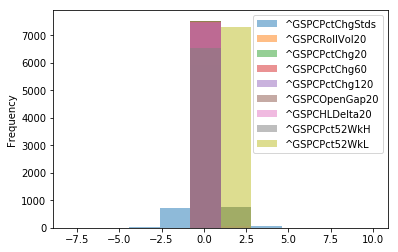

In [284]:
symbol = '^GSPC'
px_df = get_symbol_pricing(symbol)

ft_df = px_mom_feats(px_df, symbol)
# ft_df.plot(subplots=True, figsize=(10,15));
ft_df.plot.hist(alpha=0.5);

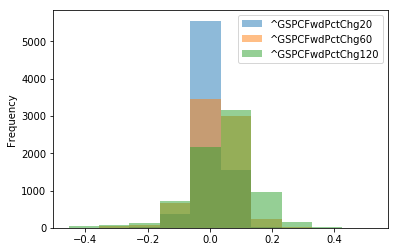

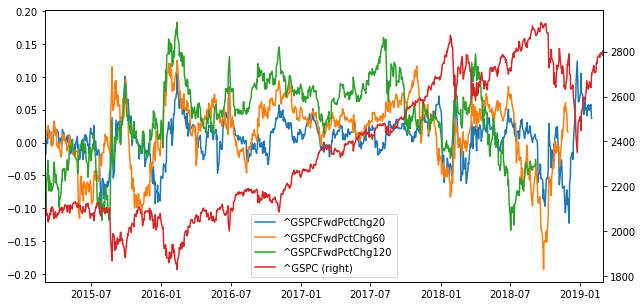

In [401]:
ft_df = px_fwd_rets(px_df, symbol)
ft_df.plot.hist(alpha=0.5);
ft_df[symbol] = px_df['close']
ft_df.tail(252*4).plot(secondary_y=symbol, figsize=(10,5));

In [405]:
%%time
# calculates forward returns for all bechmarks
fwd_rets_df = pd.DataFrame()
for s in benchSL:
    px_df = get_symbol_pricing(s)
    fwd_ret = px_fwd_rets(px_df, s)
    fwd_rets_df[fwd_ret.columns] = fwd_ret
fwd_rets_df.tail()

CPU times: user 179 ms, sys: 10 ms, total: 189 ms
Wall time: 711 ms


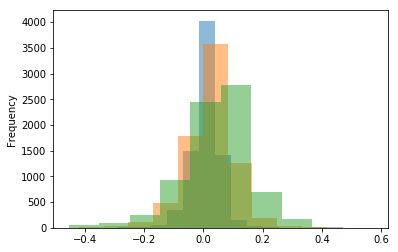

In [422]:
# average different time frames of fwd rets for all benchmarks
# do we try to estimate the average of all benchmarks or just one?
# do we try to estimate three type of fwd rets [20, 60, 120] or just one?
[fwd_rets_df[[x for x in fwd_rets_df.columns if y in x]].mean(axis=1).plot.hist(alpha=0.5)
     for y in ['g20', 'g60', 'g120']]

### Pre-processing

Y, dependent variable: Forward 3M returns for SPY

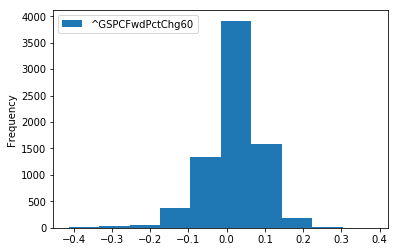

In [426]:
bench = '^GSPC'
px_df = get_symbol_pricing(bench)
Y = fwd_ret = px_fwd_rets(px_df, bench, [60])
Y.plot.hist()

X, independent variables
1. Price momentum transforms for: Benchmarks, Select Sectors, Risk, Bond ETFs (px mom)
2. Treasury transforms
3. Currency transforms

Pending: Options, commodities, and corporate bond datasets

In [558]:
%%time
df_raw = pd.DataFrame()
df_raw[Y.columns] = Y.dropna()

# price momentum transforms
px_mom = benchSL + keep_sect + rateSL + riskSL + keep_bonds
for ticker in px_mom:
    ft_df = px_mom_feats(get_symbol_pricing(ticker), ticker)
    df_raw[ft_df.columns] = ft_df

# rate transforms
rate_ft_df = rate_feats(px_close[rateSL])
df_raw[rate_ft_df.columns] = rate_ft_df

# currency transforms
FX = ['EURUSD=X', 'JPY=X', 'GBPUSD=X', 'CNY=X', 'CHF=X', 'DX-Y.NYB']
invert = ['EURUSD=X', 'GBPUSD=X']
fx_df = fx_feats(FX, invert)
df_raw[fx_df.columns] = fx_df

CPU times: user 2.56 s, sys: 267 ms, total: 2.82 s
Wall time: 6.18 s


In [559]:
df_raw.reset_index(inplace=True)
df_raw.rename({'index': 'obsDate'}, axis=1, inplace=True)

In [560]:
display_all(df_raw.describe(include='all').T)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
obsDate,7498,7498,1989-09-29,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
^GSPCFwdPctChg60,7498,NaN,NaN,NaN,0.0200452,0.0705098,-0.412918,-0.0132752,0.0264225,0.0621375,0.382452
^DJIPctChgStds,7498,NaN,NaN,NaN,0.00480128,0.740403,-7,0,0,0,10
^DJIRollVol20,7478,NaN,NaN,NaN,0.145666,0.0835913,0.0323411,0.0943488,0.125042,0.172806,0.826135
^DJIPctChg20,7478,NaN,NaN,NaN,0.00731603,0.0414624,-0.260095,-0.0140219,0.0110101,0.0317182,0.218236
^DJIPctChg60,7438,NaN,NaN,NaN,0.0217632,0.0674999,-0.343422,-0.0135107,0.0258367,0.0647181,0.325061
^DJIPctChg120,7378,NaN,NaN,NaN,0.0434963,0.0965119,-0.423246,-0.00695322,0.0459199,0.102663,0.463351
^DJIOpenGap20,7478,NaN,NaN,NaN,-0.000720178,0.00752023,-0.108697,-0.00240858,-0.000990281,0.000251324,0.0393897
^DJIHLDelta20,7478,NaN,NaN,NaN,0.262654,0.134418,0.0715588,0.170441,0.229907,0.319499,1.41108
^DJIPct52WkH,7247,NaN,NaN,NaN,0.944739,0.0751964,0.501375,0.931224,0.970887,0.992357,1


In [561]:
add_datepart(df_raw, 'obsDate')
df_raw.obsElapsed.head()

0    604886400
1    605145600
2    605232000
3    605318400
4    605404800
Name: obsElapsed, dtype: int64

In [562]:
train_cats(df_raw)

In [563]:
display_all(df_raw.isnull().sum().sort_values(ascending=False)/len(df_raw))

DX-Y.NYBPct52WkL       0.720592
DX-Y.NYBPct52WkH       0.720592
DX-Y.NYBPctChg120      0.707255
DX-Y.NYBPctChg60       0.700987
DX-Y.NYBHLDelta20      0.696852
DX-Y.NYBRollVol20      0.696852
DX-Y.NYBPctChg20       0.696852
DX-Y.NYBOpenGap20      0.696852
DX-Y.NYB               0.694719
DX-Y.NYBPctChgStds     0.694719
JNKPct52WkL            0.664177
JNKPct52WkH            0.664177
JNKPctChg120           0.646706
HYGPct52WkH            0.642171
HYGPct52WkL            0.642171
JNKPctChg60            0.638704
JNKOpenGap20           0.633369
JNKRollVol20           0.633369
JNKPctChg20            0.633369
JNKHLDelta20           0.633369
JNKPctChgStds          0.630702
GBPUSD=XPct52WkH       0.626434
GBPUSD=XPct52WkL       0.626434
EURUSD=XPct52WkH       0.626034
EURUSD=XPct52WkL       0.626034
HYGPctChg120           0.624700
CHF=XPct52WkL          0.620966
CHF=XPct52WkH          0.620966
HYGPctChg60            0.616698
GBPUSD=XPctChg120      0.612963
EURUSD=XPctChg120      0.612563
HYGRollV

In [564]:
os.makedirs('tmp', exist_ok=True)
df_raw.to_feather('tmp/macro-vix-raw')

In [2]:
df_raw = pd.read_feather('tmp/macro-vix-raw')

### Local training using RandomForest

In [3]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn import metrics

In [4]:
y_col = '^GSPCFwdPctChg60'
df, y, nas = proc_df(df_raw, y_col)

In [5]:
def split_vals(a,n): return a[:n].copy(), a[n:].copy()

n_valid = 1500
n_trn = len(df)-n_valid
raw_train, raw_valid = split_vals(df_raw, n_trn)
X_train, X_valid = split_vals(df, n_trn)
y_train, y_valid = split_vals(y, n_trn)

[x.reset_index(drop=True, inplace=True) for x in (X_train, X_valid)]

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((5998, 611), (5998,), (1500, 611), (1500,))

In [6]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [7]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [9]:
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

/Users/vveiga/miniconda3/envs/inception/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


CPU times: user 10.4 s, sys: 41.5 ms, total: 10.4 s
Wall time: 1.36 s
[0.008162614833016616, 0.06434209217895193, 0.9883098743068678, -1.0322228608074107]


In [10]:
df_trn, y_trn, nas = proc_df(df_raw, y_col, subset=3000, na_dict=nas)
X_train, _ = split_vals(df_trn, 2000)
y_train, _ = split_vals(y_trn, 2000)

In [11]:
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

/Users/vveiga/miniconda3/envs/inception/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


CPU times: user 2.77 s, sys: 34.3 ms, total: 2.8 s
Wall time: 369 ms
[0.010917332061897916, 0.10453276585880868, 0.9783146611662413, -4.363964053344078]


In [12]:
m = RandomForestRegressor(n_estimators=1, max_depth=3, bootstrap=False, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.05617839903288438, 0.13340851146929572, 0.4257884955031117, -7.736712657467425]


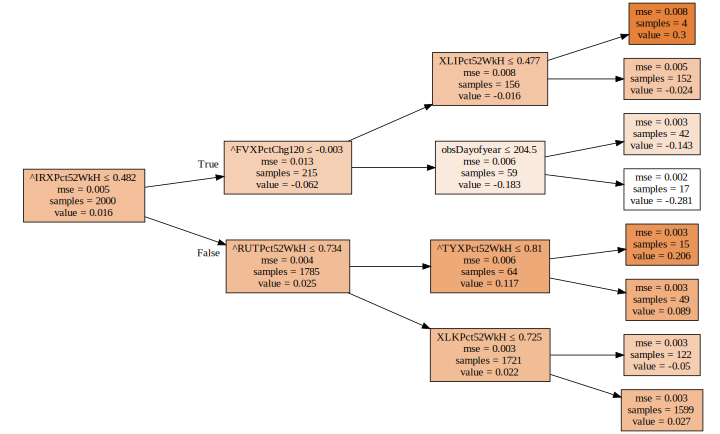

In [13]:
draw_tree(m.estimators_[0], df_trn, precision=3)

In [14]:
m = RandomForestRegressor(n_estimators=1, bootstrap=False, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[9.656461086408655e-05, 0.16203275040428705, 0.9999983034402407, -11.888031335191561]


Intro to bagging

In [15]:
m = RandomForestRegressor(n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

/Users/vveiga/miniconda3/envs/inception/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.010789996067612837, 0.11747690633515429, 0.9788175716941967, -5.774636190579817]


In [16]:
preds = np.stack([t.predict(X_valid) for t in m.estimators_])
preds[:,0], np.mean(preds[:,0]), y_valid[0]

(array([-0.0232 ,  0.02388,  0.03672,  0.08909,  0.05486,  0.05106,  0.08363,  0.07667, -0.01238,  0.02251]),
 0.0402844725008694,
 0.07278867954584256)

In [17]:
preds.shape

(10, 1500)

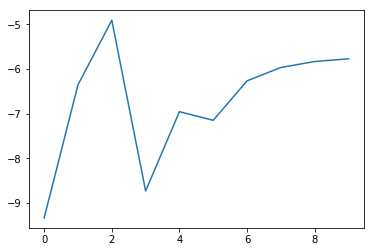

In [18]:
plt.plot([metrics.r2_score(y_valid, np.mean(preds[:i+1], axis=0)) for i in range(10)]);

In [19]:
m = RandomForestRegressor(n_estimators=20, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.009527292384324175, 0.10141727369952752, 0.9834852440790901, -4.048993815949946]


In [20]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.009029573022849765, 0.09407214898177128, 0.98516568142799, -3.3441329260258996]


In [21]:
m = RandomForestRegressor(n_estimators=80, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.008159512437619613, 0.10396049465679154, 0.9878867246367941, -4.30539409861844]


In [22]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.009082286322597284, 0.09660264785759903, 0.9849919747910293, -3.580986758584203, 0.8934163983824874]


In [23]:
df_trn, y_trn, nas = proc_df(df_raw, y_col)
X_train, X_valid = split_vals(df_trn, n_trn)
y_train, y_valid = split_vals(y_trn, n_trn)

In [24]:
set_rf_samples(2000)

In [25]:
m = RandomForestRegressor(n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train)
print_score(m)

/Users/vveiga/miniconda3/envs/inception/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


CPU times: user 4.51 s, sys: 43.2 ms, total: 4.55 s
Wall time: 705 ms
[0.018081396370146115, 0.06877642431113233, 0.9426379708379918, -1.3219890192868964, 0.890892289423568]


In [26]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.01551329736663105, 0.0740164990999246, 0.9577750827304534, -1.6892925863121837, 0.9192575499619335]


In [27]:
reset_rf_samples()

In [28]:
def dectree_max_depth(tree):
    children_left = tree.children_left
    children_right = tree.children_right

    def walk(node_id):
        if (children_left[node_id] != children_right[node_id]):
            left_max = 1 + walk(children_left[node_id])
            right_max = 1 + walk(children_right[node_id])
            return max(left_max, right_max)
        else: # leaf
            return 1

    root_node_id = 0
    return walk(root_node_id)

In [29]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.006286457969360445, 0.0705364467305707, 0.9930661793319616, -1.4423513026177681, 0.9506788774533029]


In [30]:
t=m.estimators_[0].tree_

In [31]:
dectree_max_depth(t)

29

In [32]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.010169377284020268, 0.07783091248864886, 0.9818553208690175, -1.9736182927306753, 0.9367668106053185]


In [33]:
t=m.estimators_[0].tree_

In [34]:
dectree_max_depth(t)

31

In [35]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.007970959948319159, 0.06808959904746738, 0.9888523884588667, -1.2758442067495452, 0.9444915885697737]


In [36]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.007815345598114152, 0.058405008091962494, 0.9892834018075194, -0.6744845790985846, 0.9473788824796092]


Confidence based on tree variance

In [37]:
set_rf_samples(3500)

In [38]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.011345060778749548, 0.06367705685089531, 0.9774173852148992, -0.9904301417007887, 0.9412729173363578]


In [39]:
%time preds = np.stack([t.predict(X_valid) for t in m.estimators_])
np.mean(preds[:,0]), np.std(preds[:,0])

CPU times: user 1.55 s, sys: 23 ms, total: 1.57 s
Wall time: 1.57 s


(0.060794150810045154, 0.03651536954906075)

In [40]:
def get_preds(t): return t.predict(X_valid)
%time preds = np.stack(parallel_trees(m, get_preds))
np.mean(preds[:,0]), np.std(preds[:,0])

CPU times: user 43.7 ms, sys: 42.8 ms, total: 86.6 ms
Wall time: 482 ms


(0.060794150810045154, 0.03651536954906075)

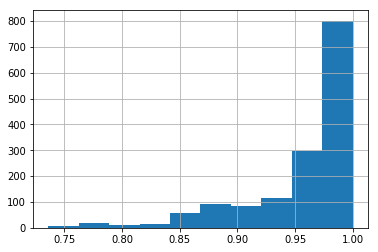

In [56]:
x = raw_valid.copy()
x['pred_std'] = np.std(preds, axis=0)
x['pred'] = np.mean(preds, axis=0)
x['^RUTPct52WkH'].hist()

In [57]:
flds = ['^RUTPct52WkH', y_col, 'pred', 'pred_std']
enc_summ = x[flds].groupby('^RUTPct52WkH', as_index=False).mean()
enc_summ

,^RUTPct52WkH,^GSPCFwdPctChg60,pred,pred_std
0,0.736009,0.125533,0.054828,0.138706
1,0.743541,0.110851,0.061608,0.137119
2,0.743865,0.107126,0.060128,0.134923
3,0.748063,0.106656,0.059570,0.139606
4,0.750108,0.117767,0.042575,0.139600
5,0.760627,0.097508,0.028799,0.156887
6,0.767765,0.107079,-0.025601,0.178297
7,0.768483,0.089091,-0.009600,0.160569
8,0.769671,0.120573,-0.039468,0.178120
9,0.769694,0.120037,-0.007609,0.164384


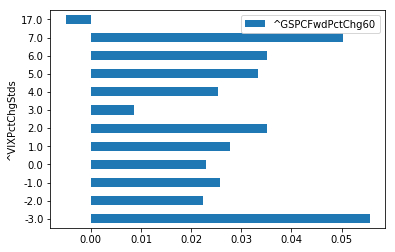

In [50]:
enc_summ = enc_summ[~pd.isnull(enc_summ[y_col])]
enc_summ.plot('^VIXPctChgStds', y_col, 'barh');

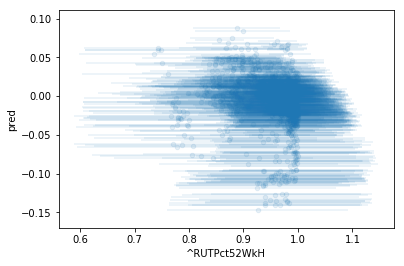

In [63]:
enc_summ.plot('^RUTPct52WkH', 'pred', 'scatter', xerr='pred_std', alpha=0.1);

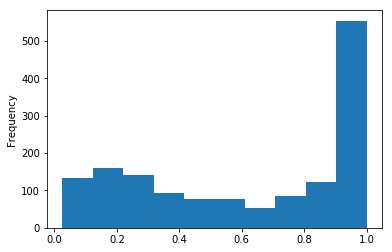

In [64]:
raw_valid['^IRXPct52WkH'].plot.hist();

In [65]:
flds = ['^IRXPct52WkH', y_col, 'pred', 'pred_std']
summ = x[flds].groupby(flds[0]).mean()
summ

,^GSPCFwdPctChg60,pred,pred_std
^IRXPct52WkH,,,
0.025000,0.066151,-0.003878,0.090357
0.030612,0.022053,0.034817,0.098870
0.032609,0.016081,-0.003036,0.098102
0.037500,0.004474,0.025684,0.077650
0.041667,0.046097,-0.002079,0.087475
0.041667,0.008524,-0.000259,0.086108
0.051020,-0.021823,0.043895,0.092026
0.054348,0.054527,0.037058,0.082478
0.054545,0.016323,0.042514,0.067314


In [66]:
(summ.pred_std/summ.pred).sort_values(ascending=False)

^IRXPct52WkH
0.966292     532.880826
0.924925     194.818913
0.990476     193.825668
0.194805     173.809022
0.416667     142.655789
0.996979     123.397594
0.744745      89.787341
0.917782      89.537974
0.992576      88.078322
0.774775      83.872164
0.728571      68.241945
0.975369      64.604975
0.991944      63.191293
0.458333      56.652315
0.960961      52.149428
0.727612      46.863486
0.934783      42.219114
0.751429      42.032172
0.980876      40.711882
0.255102      38.018972
0.637143      35.893684
0.973726      35.283154
0.995633      34.559843
0.960182      34.072143
0.999115      31.719046
0.708333      28.422980
0.076087      27.836344
0.906957      27.717424
0.789790      27.454751
0.987469      27.147252
               ...     
0.032609     -32.309676
0.880000     -33.446386
0.872174     -34.281836
0.885714     -34.863270
0.994760     -35.226414
0.540541     -36.173423
0.363636     -36.590641
0.041667     -42.083946
0.971535     -42.374092
0.866667     -43.082614
0.4

Feature importance

In [83]:
fi = rf_feat_importance(m, df_trn); fi[:40]

,cols,imp
34,^RUTPct52WkH,0.062557
279,CNY=XPct52WkH,0.046782
151,XLKPct52WkH,0.036314
313,obsElapsed,0.030548
143,XLEPct52WkL,0.025573
93,EEMPctChg60,0.022876
16,^IXICPct52WkH,0.021898
239,^TYXTSPrem,0.021069
31,^RUTPctChg120,0.016626
4,^DJIPctChg120,0.016189


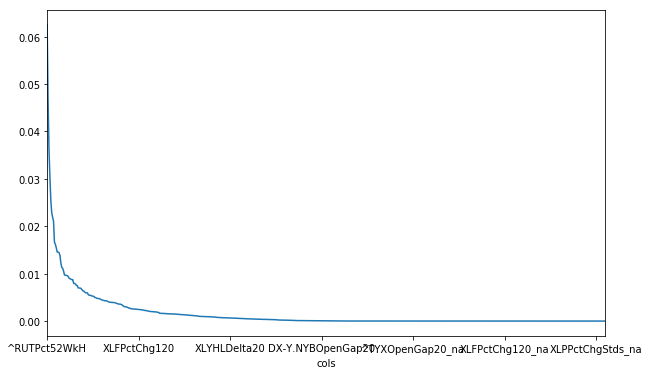

In [68]:
fi.plot('cols', 'imp', figsize=(10,6), legend=False);

In [81]:
def plot_fi(fi): return fi.plot('cols', 'imp', 'barh', figsize=(15,10), legend=False)

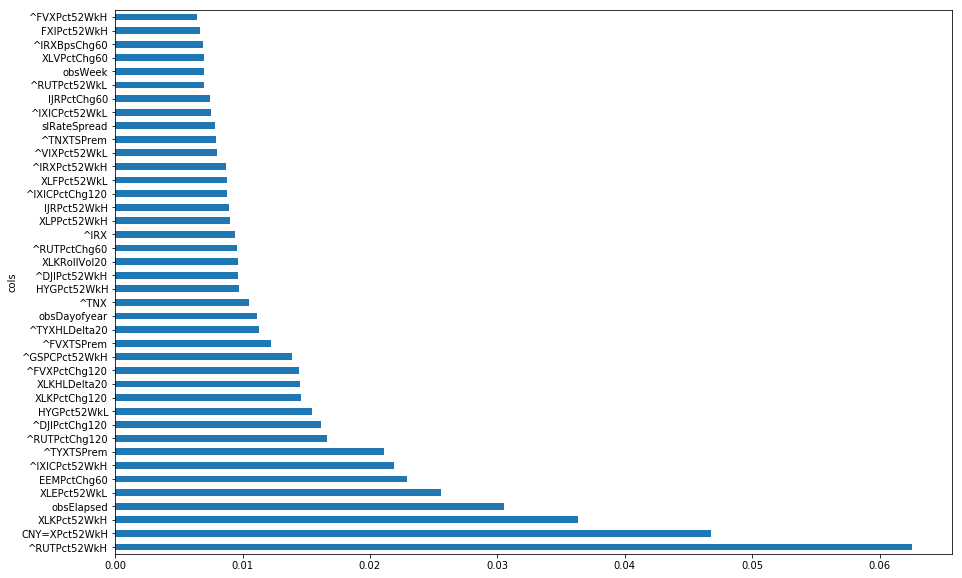

In [82]:
plot_fi(fi[:40]);

In [87]:
to_keep = fi[fi.imp>0.006].cols; len(to_keep)

42

In [88]:
df_keep = df_trn[to_keep].copy()
X_train, X_valid = split_vals(df_keep, n_trn)

In [89]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5,
                          n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.01221703030092826, 0.06941980307391139, 0.9738126305838191, -1.3656349625808482, 0.9390914266990738]


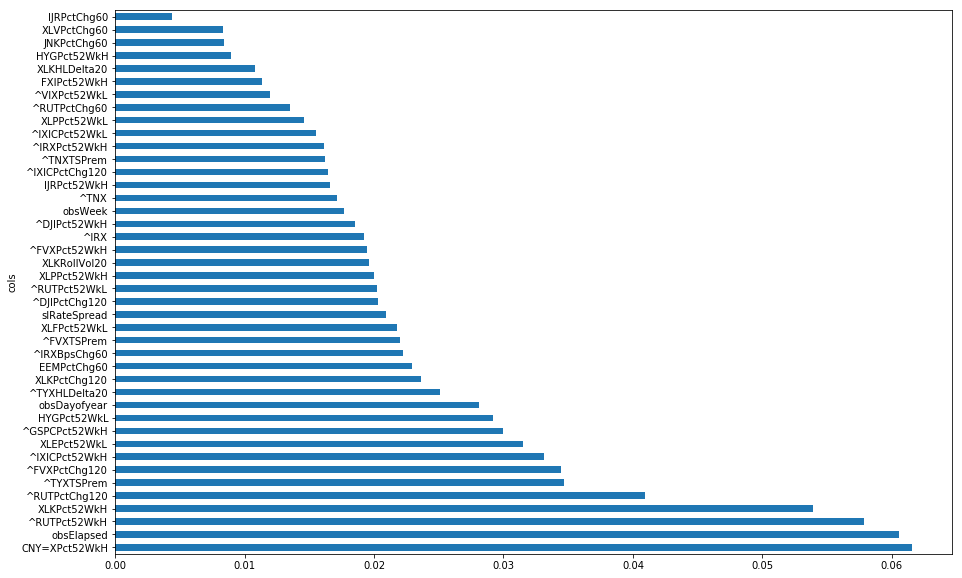

In [90]:
fi = rf_feat_importance(m, df_keep)
plot_fi(fi);

One-hot enconding

In [92]:
df_trn2, y_trn, nas = proc_df(df_raw, y_col, max_n_cat=7)
X_train, X_valid = split_vals(df_trn2, n_trn)

m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.6, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.011502822509653064, 0.08332031460198121, 0.9767849614127724, -2.407868103065222, 0.9382521023259162]


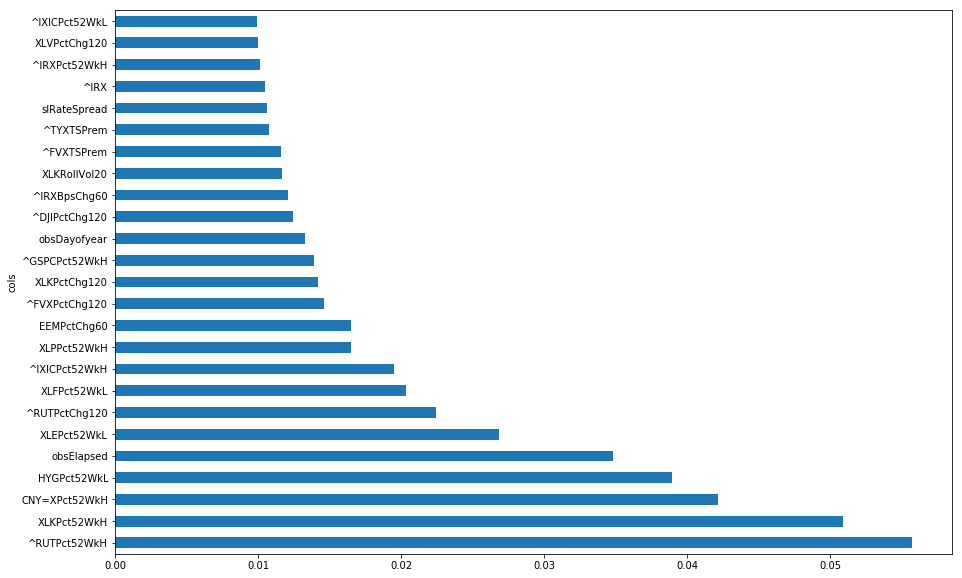

In [93]:
fi = rf_feat_importance(m, df_trn2)
plot_fi(fi[:25]);

In [94]:
from scipy.cluster import hierarchy as hc

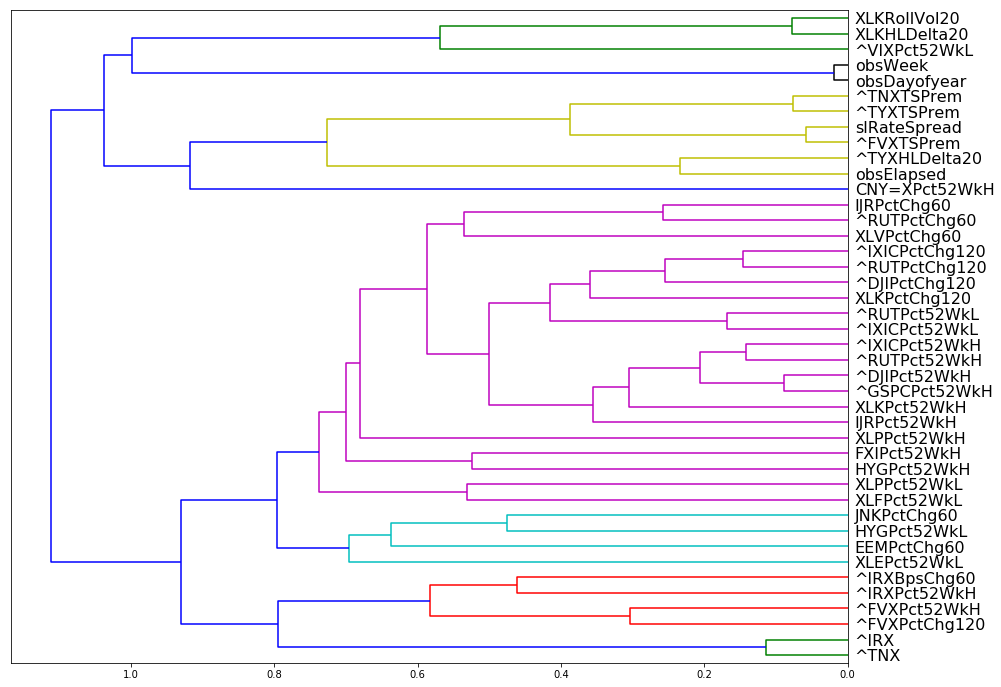

In [101]:
corr = np.round(scipy.stats.spearmanr(df_keep).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(15,12))
dendrogram = hc.dendrogram(z, labels=df_keep.columns, orientation='left', leaf_font_size=16)
plt.show()

In [97]:
def get_oob(df):
    m = RandomForestRegressor(n_estimators=30, min_samples_leaf=5, max_features=0.6, n_jobs=-1, oob_score=True)
    x, _ = split_vals(df, n_trn)
    m.fit(x, y_train)
    return m.oob_score_

In [98]:
get_oob(df_keep)

0.9274891897283806

In [102]:
for c in ('obsWeek', 'obsDayofyear', 'slRateSpread', '^FVXTSPrem', '^DJIPct52WkH', '^GSPCPct52WkH', '^IRX', '^TNX'):
    print(c, get_oob(df_keep.drop(c, axis=1)))

obsWeek 0.9260068115854009
obsDayofyear 0.929257259181386
slRateSpread 0.9306233522946735
^FVXTSPrem 0.92939403239313
^DJIPct52WkH 0.9265836987649623
^GSPCPct52WkH 0.928094829159186
^IRX 0.9243212390926434
^TNX 0.9247267113586042


In [103]:
to_drop = ['obsDayofyear', '^FVXTSPrem', '^DJIPct52WkH', '^IRX']
get_oob(df_keep.drop(to_drop, axis=1))

0.9235141252825945

In [104]:
df_keep.drop(to_drop, axis=1, inplace=True)
X_train, X_valid = split_vals(df_keep, n_trn)

In [105]:
np.save('tmp/keep_cols.npy', np.array(df_keep.columns))

In [107]:
keep_cols = np.load('tmp/keep_cols.npy')
df_keep = df_trn[keep_cols]

In [108]:
reset_rf_samples()

In [109]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.008786277917266822, 0.06824155463991845, 0.9864552671031916, -1.2860135468847647, 0.947147412851571]


Partial dependence

### Visualization

In [ ]:
# show correlations with Y variables
show = ['mktFwdChg1m', 'mktFwdChg3m', 'mktFwdChg6m']
ml_ds_df.corr()[show]

In [ ]:
# series distributions
%time ml_ds_df.hist(figsize=(15,15));

In [ ]:
# scatter plots
%time pd.plotting.scatter_matrix(ml_ds_df, alpha=0.1, figsize=(40, 40));

### Discretize forward returns into classes

In [ ]:
for c in class_cols:  ml_ds_df[c] = pd.cut(
    ml_ds_df[c], cut_range, labels=fwd_ret_labels)

### Save datasets with dependent variable into S3

In [ ]:
# Split into different datasets with Y at the end, save in S3
Xs = [x for x in ml_ds_cols if x not in class_cols]
for y in class_cols:
    ds_cols = Xs + [y] # join Xs and Y
    fname = ds_name + y # dataset name
    # drop nas and shuffle the data    
    ml_ds_df_y = ml_ds_df[ds_cols].dropna().sample(frac=1)
    csv_store(ml_ds_df_y, 'training/', csv_ext.format(fname))
    print(update_fmt.format(len(ml_ds_df_y), fname))

In [ ]:
# last uploaded dataset
ml_ds_df_y.info()

In [ ]:
# get prediction record
class_cols = ['mktFwdChg1m', 'mktFwdChg3m', 'mktFwdChg6m']
record = ml_ds_df.drop(columns=class_cols).iloc[-1]
record, record.values

### Old visualizations

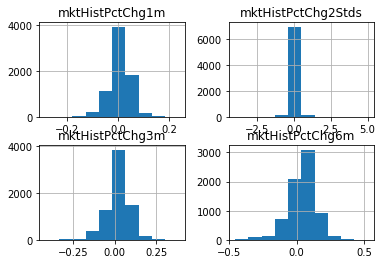

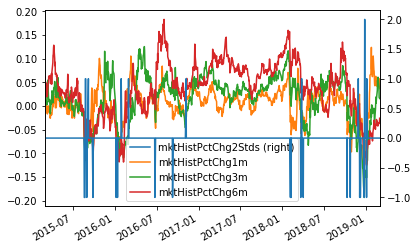

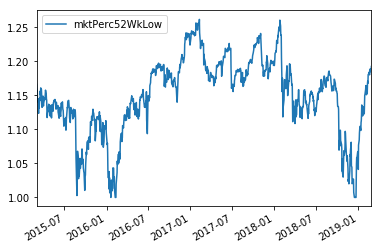

In [14]:
# historical returns for 1, 3, and 6 months
secpx['mktHistPctChgStds'] = SPY_pct_chg.apply(sign_compare, args=(SPY_pct_chg.std(),))
secpx['mktHistPctChg1m'] = SPY_close.pct_change(periods=20)
secpx['mktHistPctChg3m'] = SPY_close.pct_change(periods=60)
secpx['mktHistPctChg6m'] = SPY_close.pct_change(periods=120)
secpx['mktPerc52WkHigh'] = (SPY_close / SPY_close.rolling(252).max())
secpx['mktPerc52WkLow'] = (SPY_close / SPY_close.rolling(252).min())

show = ['mktHistPctChgStds', 'mktHistPctChg1m', 'mktHistPctChg3m', 
        'mktHistPctChg6m']
secpx[show].hist();
secpx[show].tail(252*4).plot(secondary_y='mktHistPctChgStds');
show = ['mktPerc52WkLow']
secpx[show].tail(252*4).plot();

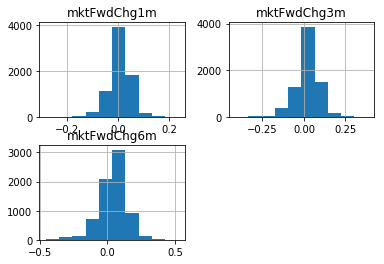

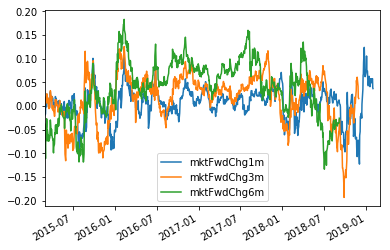

In [15]:
# Forward returns, 1w, 1m, 3m
SPY_close.pct_change(5).shift(-5)
secpx['mktFwdChg1m'] = SPY_close.pct_change(20).shift(-20)
secpx['mktFwdChg3m'] = SPY_close.pct_change(60).shift(-60)
secpx['mktFwdChg6m'] = SPY_close.pct_change(120).shift(-120)

show = ['mktFwdChg1m', 'mktFwdChg3m', 'mktFwdChg6m']
secpx[show].hist();
secpx[show].tail(252*4).plot();

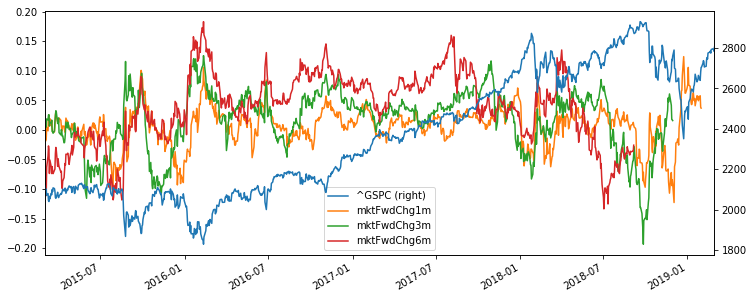

In [16]:
show = [bench_symbol, 'mktFwdChg1m', 'mktFwdChg3m', 'mktFwdChg6m']
secpx[show].tail(252*4).plot(secondary_y=bench_symbol, figsize=(12,5));

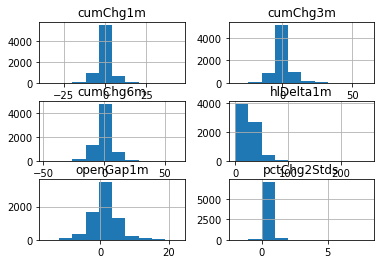

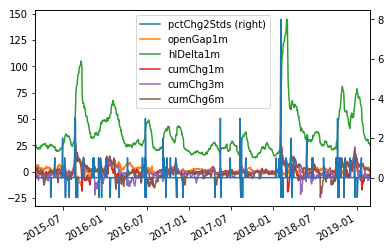

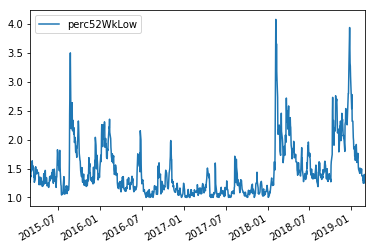

In [17]:
# cumulative deltas and gap analysis
secpx['pctChgStds'] = pct_chg.apply(sign_compare, args=(pct_chg.std(),))
secpx['openGap1m'] = (openpx - closepx.shift(1)).rolling(20).sum()
secpx['hlDelta1m'] = (highpx - lowpx).rolling(20).sum()
secpx['cumChg1m'] = (closepx - closepx.shift(1)).rolling(20).sum()
secpx['cumChg3m'] = (closepx - closepx.shift(1)).rolling(60).sum()
secpx['cumChg6m'] = (closepx - closepx.shift(1)).rolling(120).sum()
secpx['perc52WkLow'] = (closepx / closepx.rolling(252).min())

show = ['pctChgStds', 'openGap1m', 'hlDelta1m', 
        'cumChg1m', 'cumChg3m', 'cumChg6m']
secpx[show].hist();
secpx[show].tail(252*4).plot(secondary_y='pctChgStds');
show = ['perc52WkLow']
secpx[show].tail(252*4).plot();

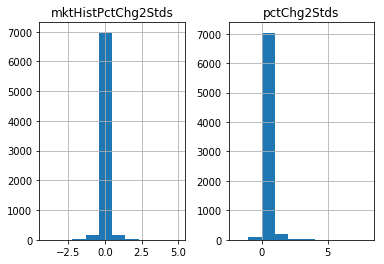

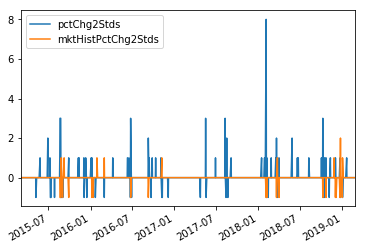

In [18]:
show = ['pctChgStds', 'mktHistPctChgStds']
secpx[show].hist();
secpx[show].tail(252*4).plot();

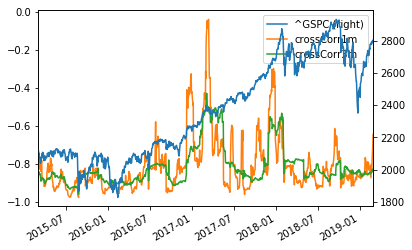

In [19]:
# rolling SPY correlations
secpx['crossCorr1m'] = closepx.pct_change().rolling(20).corr(SPY_pct_chg)
secpx['crossCorr3m'] = closepx.pct_change().rolling(60).corr(SPY_pct_chg)

show = [bench_symbol, 'crossCorr1m', 'crossCorr3m']
secpx[show].tail(252*4).plot(secondary_y=bench_symbol);
# closepx.pct_change().corr(SPY_pct_chg)

### Other code

In [227]:
ds_name = 'ds_macro_vix_'
update_fmt = 'Added {} to {} dataset'
class_cols = ['mktFwdChg1m', 'mktFwdChg3m', 'mktFwdChg6m']
cut_range = [-1, -0.1, .0, .02, .1, 1.]
fwd_ret_labels = ["bear", "short", "neutral", "long", "bull"]

In [21]:
# remove unnecessary columns
dont_show = ['high', 'open', 'low', bench_symbol]
ml_ds_cols = [x for x in secpx.columns.tolist() if x not in dont_show]
df_raw = secpx[ml_ds_cols].copy()

In [ ]:
# quick overview on statistically significnat pct moves
# pd.value_counts(secpx['pct_chg_std']).sort_index()
# secpx['pct_chg_std'][secpx['pct_chg_std'] > 15]
# secpx.loc['2018-02',:]